# Лабораторная работа № 1
### Боровских Вадим, 932003
## С) Регрессор  DS_2019_public.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

In [3]:
df = pd.read_csv("DS_2019_public.csv", index_col=0, encoding='cp1252', dtype={col: 'str' for col in [30,56,96,114]})
df=df.reset_index() 
df

,Climate_Region_Pub,DIVISION,REPORTABLE_DOMAIN,DOLELCOL,TOTALDOLCOL,KWHCOL,BTUELCOL,TOTALBTUCOL,TOTALDOLSPH,TOTALBTUSPH,...,LGT1EE,TOTALBTUWTH,ROOFTYPE,DOLELRFG,TOTALDOLRFG,HEATROOM,WDWATER,UGWARM,DRYRFUEL,KWHRFG
0,5,10,26,16.793,17,181.998,620.979,621,368,38606,...,-2,30110,2,120.893,121,4,0,1,1,1310.220
1,1,1,1,48.901,49,184.459,629.389,629,582,40248,...,2,7933,-2,242.746,243,2,0,1,-2,915.664
2,1,3,7,101.048,101,1063.022,3627.013,3627,425,40196,...,-2,6440,5,158.797,159,7,0,1,5,1670.534
3,1,1,1,0,0,0.000,0.000,0,616,36136,...,2,13884,5,85.138,85,5,0,1,5,346.468
4,1,4,10,45.132,45,274.530,936.677,937,685,74100,...,3,14204,6,151.319,151,6,0,1,5,920.454
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10870,4,5,13,345.8,346,2695.625,9197.516,9198,820,26863,...,8,7179,5,264.409,264,7,0,0,5,2061.159
10871,1,3,9,13.005,13,97.497,332.665,333,521,49610,...,4,6471,6,75.569,76,5,0,1,5,566.544
10872,1,4,10,97.67,98,847.734,2892.504,2893,591,70626,...,-2,24391,6,250.313,250,8,0,1,1,2172.621
10873,1,8,23,12.834,13,135.687,462.975,463,432,49821,...,0,12416,6,175.135,175,5,0,1,1,1851.648


In [4]:
df.columns

Index(['Climate_Region_Pub', 'DIVISION', 'REPORTABLE_DOMAIN', 'DOLELCOL',
       'TOTALDOLCOL', 'KWHCOL', 'BTUELCOL', 'TOTALBTUCOL', 'TOTALDOLSPH',
       'TOTALBTUSPH',
       ...
       'LGT1EE', 'TOTALBTUWTH', 'ROOFTYPE', 'DOLELRFG', 'TOTALDOLRFG',
       'HEATROOM', 'WDWATER', 'UGWARM', 'DRYRFUEL', 'KWHRFG'],
      dtype='object', length=121)

In [6]:
df.dtypes

Climate_Region_Pub      int64
DIVISION                int64
REPORTABLE_DOMAIN       int64
DOLELCOL               object
TOTALDOLCOL             int64
                       ...   
HEATROOM                int64
WDWATER                 int64
UGWARM                  int64
DRYRFUEL                int64
KWHRFG                float64
Length: 121, dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10875 entries, 0 to 10874
Columns: 121 entries, Climate_Region_Pub to KWHRFG
dtypes: float64(34), int64(79), object(8)
memory usage: 10.0+ MB


In [7]:
df.describe()

,Climate_Region_Pub,DIVISION,REPORTABLE_DOMAIN,TOTALDOLCOL,KWHCOL,BTUELCOL,TOTALBTUCOL,TOTALDOLSPH,TOTALBTUSPH,CELLAR,...,TEMPGONE,LGT1EE,TOTALBTUWTH,ROOFTYPE,TOTALDOLRFG,HEATROOM,WDWATER,UGWARM,DRYRFUEL,KWHRFG
count,10875.000000,10875.000000,10875.000000,10875.000000,10875.000000,10875.000000,10875.000000,10875.000000,10875.000000,10875.000000,...,10875.000000,10875.000000,10875.000000,10875.000000,10875.000000,10875.000000,10875.000000,10875.000000,10875.000000,10875.000000
mean,2.601195,5.371034,14.778391,202.429333,1682.782696,5741.654205,5741.650943,561.501517,36931.489103,-0.082943,...,63.789609,0.818115,16313.564138,3.675126,154.358345,5.347126,0.000828,0.501793,2.984184,1244.033159
std,1.349507,2.862200,8.207299,310.691148,2480.831034,8464.594227,8464.591405,505.921369,35823.762607,1.066451,...,14.406053,2.346643,13733.416871,2.775507,106.994526,2.636779,0.028757,0.500020,2.841844,778.588285
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.000000,...,-2.000000,-9.000000,0.000000,-2.000000,0.000000,-2.000000,0.000000,0.000000,-2.000000,0.000000
25%,1.000000,3.000000,8.000000,18.000000,143.161500,488.477000,488.500000,222.000000,8748.500000,0.000000,...,62.000000,0.000000,7708.000000,2.000000,86.000000,4.000000,0.000000,0.000000,1.000000,723.870500
50%,3.000000,5.000000,15.000000,90.000000,748.220000,2552.933000,2553.000000,431.000000,27289.000000,0.000000,...,67.000000,0.000000,12761.000000,5.000000,127.000000,5.000000,0.000000,1.000000,5.000000,1047.355000
75%,4.000000,7.000000,21.000000,263.000000,2281.322500,7783.797500,7784.000000,762.500000,55784.500000,1.000000,...,70.000000,2.000000,21169.500000,5.000000,193.000000,7.000000,0.000000,1.000000,5.000000,1558.283000
max,5.000000,10.000000,27.000000,7729.000000,60995.431000,208116.552000,208117.000000,9264.000000,548711.000000,1.000000,...,90.000000,40.000000,284130.000000,8.000000,2490.000000,23.000000,1.000000,1.000000,5.000000,11069.027000


In [11]:
from sklearn.preprocessing import MinMaxScaler
# Удалите строки с некорректными значениями
df = df[~df.apply(lambda row: row.astype(str).str.contains('[^0-9.]').any(), axis=1)]
# Затем выполните масштабирование
X = df.drop(['TOTALBTUCOL'], axis=1)
y = df['TOTALBTUCOL']
min_max_scaler = MinMaxScaler()
X = min_max_scaler.fit_transform(X)

### Разделение данных на обучающую и тестовую выборки


In [12]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=0)
print(f'Train : {X_train_val.shape}, Test : {X_test.shape}')
print(f'Train : {X_train.shape}, Test : {X_val.shape}')

Train : (3976, 120), Test : (995, 120)
Train : (3180, 120), Test : (796, 120)


### Построение модели


In [15]:
from keras.models import Sequential
from keras.layers import Dense
regressor = Sequential()
regressor.add(Dense(120, activation='relu', input_dim=X_train.shape[1]))
regressor.add(Dense(60,activation='relu'))
regressor.add(Dense(1,activation='linear'))
regressor.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 120)               14520     
                                                                 
 dense_1 (Dense)             (None, 60)                7260      
                                                                 
 dense_2 (Dense)             (None, 1)                 61        
                                                                 
Total params: 21841 (85.32 KB)
Trainable params: 21841 (85.32 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [16]:
regressor.compile(loss='mse', optimizer='adam', metrics='mae')

In [19]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=20, mode='min', verbose=1)
checkpoint = ModelCheckpoint('regressor_weights-{epoch:02d}-{val_loss:.3f}.hdf5',
monitor='val_loss', verbose=1, mode='min', save_best_only=True)
callbacks_list = [early_stop, checkpoint]

### Обучение модели


In [30]:
regressor_history = regressor.fit(X_train, y_train, batch_size=40, validation_data=(X_val, y_val),
callbacks=callbacks_list, epochs=350)

Epoch 1/350
71/80 [=========================>....] - ETA: 0s - loss: 73595.1016 - mae: 177.5685
Epoch 1: val_loss improved from 91159.12500 to 88805.09375, saving model to regressor_weights-01-88805.094.hdf5
80/80 [==============================] - 1s 8ms/step - loss: 79100.7031 - mae: 178.3285 - val_loss: 88805.0938 - val_mae: 185.0776
Epoch 2/350
36/80 [============>.................] - ETA: 0s - loss: 83602.2031 - mae: 185.7291

D:\Anaconda\lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


72/80 [==========================>...] - ETA: 0s - loss: 81987.7500 - mae: 179.8768
Epoch 2: val_loss improved from 88805.09375 to 85150.42969, saving model to regressor_weights-02-85150.430.hdf5
80/80 [==============================] - 1s 6ms/step - loss: 78983.8438 - mae: 177.4560 - val_loss: 85150.4297 - val_mae: 181.1830
Epoch 3/350
72/80 [==========================>...] - ETA: 0s - loss: 80904.6797 - mae: 179.5310
Epoch 3: val_loss did not improve from 85150.42969
80/80 [==============================] - 0s 6ms/step - loss: 79744.4062 - mae: 178.4410 - val_loss: 87148.1172 - val_mae: 180.1727
Epoch 4/350
80/80 [==============================] - ETA: 0s - loss: 79679.9922 - mae: 180.1443
Epoch 4: val_loss did not improve from 85150.42969
80/80 [==============================] - 1s 7ms/step - loss: 79679.9922 - mae: 180.1443 - val_loss: 86781.7891 - val_mae: 186.2940
Epoch 5/350
80/80 [==============================] - ETA: 0s - loss: 78941.2656 - mae: 178.3729
Epoch 5: val_loss imp

80/80 [==============================] - 1s 7ms/step - loss: 35629.4414 - mae: 121.8090 - val_loss: 39291.1523 - val_mae: 125.9417
Epoch 55/350
79/80 [============================>.] - ETA: 0s - loss: 34444.9062 - mae: 119.0653
Epoch 55: val_loss did not improve from 39291.15234
80/80 [==============================] - 1s 7ms/step - loss: 34271.1289 - mae: 118.7541 - val_loss: 40653.0586 - val_mae: 125.8112
Epoch 56/350
79/80 [============================>.] - ETA: 0s - loss: 34845.2148 - mae: 121.5896
Epoch 56: val_loss improved from 39291.15234 to 37378.65625, saving model to regressor_weights-56-37378.656.hdf5
80/80 [==============================] - 1s 7ms/step - loss: 34722.1016 - mae: 121.4540 - val_loss: 37378.6562 - val_mae: 123.6144
Epoch 57/350
72/80 [==========================>...] - ETA: 0s - loss: 35281.0625 - mae: 121.4261
Epoch 57: val_loss did not improve from 37378.65625
80/80 [==============================] - 0s 6ms/step - loss: 34396.6602 - mae: 120.7084 - val_loss:

Epoch 82/350
79/80 [============================>.] - ETA: 0s - loss: 21694.6523 - mae: 97.1942
Epoch 82: val_loss improved from 26783.65234 to 25962.27734, saving model to regressor_weights-82-25962.277.hdf5
80/80 [==============================] - 1s 7ms/step - loss: 21649.7188 - mae: 97.1768 - val_loss: 25962.2773 - val_mae: 102.5116
Epoch 83/350
72/80 [==========================>...] - ETA: 0s - loss: 21581.5938 - mae: 97.3926
Epoch 83: val_loss did not improve from 25962.27734
80/80 [==============================] - 0s 6ms/step - loss: 20900.3867 - mae: 96.0766 - val_loss: 25980.2793 - val_mae: 108.6397
Epoch 84/350
76/80 [===========================>..] - ETA: 0s - loss: 18209.1348 - mae: 88.9792
Epoch 84: val_loss improved from 25962.27734 to 23760.43750, saving model to regressor_weights-84-23760.438.hdf5
80/80 [==============================] - 1s 7ms/step - loss: 19500.0098 - mae: 89.9133 - val_loss: 23760.4375 - val_mae: 100.7198
Epoch 85/350
71/80 [========================

80/80 [==============================] - 0s 6ms/step - loss: 8443.0723 - mae: 63.1142 - val_loss: 9494.5049 - val_mae: 62.6239
Epoch 137/350
69/80 [========================>.....] - ETA: 0s - loss: 8419.2520 - mae: 63.3608
Epoch 137: val_loss did not improve from 9471.70117
80/80 [==============================] - 1s 6ms/step - loss: 8126.2402 - mae: 62.4721 - val_loss: 10439.9131 - val_mae: 73.1618
Epoch 138/350
70/80 [=========================>....] - ETA: 0s - loss: 7189.4434 - mae: 58.8826
Epoch 138: val_loss did not improve from 9471.70117
80/80 [==============================] - 1s 7ms/step - loss: 7530.9258 - mae: 59.5182 - val_loss: 10436.8252 - val_mae: 70.2133
Epoch 139/350
70/80 [=========================>....] - ETA: 0s - loss: 8705.6953 - mae: 64.5773
Epoch 139: val_loss improved from 9471.70117 to 9040.08691, saving model to regressor_weights-139-9040.087.hdf5
80/80 [==============================] - 1s 7ms/step - loss: 8304.8623 - mae: 63.3846 - val_loss: 9040.0869 - val

73/80 [==========================>...] - ETA: 0s - loss: 2983.5571 - mae: 38.0300
Epoch 192: val_loss improved from 3754.92578 to 3688.52637, saving model to regressor_weights-192-3688.526.hdf5
80/80 [==============================] - 1s 7ms/step - loss: 2962.7720 - mae: 38.0442 - val_loss: 3688.5264 - val_mae: 36.8771
Epoch 193/350
71/80 [=========================>....] - ETA: 0s - loss: 3138.6204 - mae: 38.6884
Epoch 193: val_loss did not improve from 3688.52637
80/80 [==============================] - 0s 6ms/step - loss: 3388.8494 - mae: 40.5930 - val_loss: 5380.4185 - val_mae: 50.6281
Epoch 194/350
73/80 [==========================>...] - ETA: 0s - loss: 3819.6335 - mae: 43.5376
Epoch 194: val_loss did not improve from 3688.52637
80/80 [==============================] - 1s 7ms/step - loss: 3769.5417 - mae: 43.1534 - val_loss: 5023.4302 - val_mae: 42.7295
Epoch 195/350
75/80 [===========================>..] - ETA: 0s - loss: 3046.8550 - mae: 37.4288
Epoch 195: val_loss improved from

80/80 [==============================] - 0s 6ms/step - loss: 2100.5364 - mae: 31.2501 - val_loss: 3437.6040 - val_mae: 44.3097
Epoch 221/350
72/80 [==========================>...] - ETA: 0s - loss: 2100.5725 - mae: 33.2342
Epoch 221: val_loss did not improve from 2643.35181
80/80 [==============================] - 0s 6ms/step - loss: 2150.4473 - mae: 33.3741 - val_loss: 5188.2559 - val_mae: 44.7384
Epoch 222/350
71/80 [=========================>....] - ETA: 0s - loss: 2185.2908 - mae: 31.0357
Epoch 222: val_loss improved from 2643.35181 to 2523.51562, saving model to regressor_weights-222-2523.516.hdf5
80/80 [==============================] - 1s 6ms/step - loss: 2067.6445 - mae: 30.3329 - val_loss: 2523.5156 - val_mae: 30.2176
Epoch 223/350
73/80 [==========================>...] - ETA: 0s - loss: 1767.2172 - mae: 28.2194
Epoch 223: val_loss did not improve from 2523.51562
80/80 [==============================] - 0s 6ms/step - loss: 1780.9038 - mae: 28.1145 - val_loss: 2694.1750 - val_m

72/80 [==========================>...] - ETA: 0s - loss: 1082.0426 - mae: 22.6049
Epoch 278: val_loss did not improve from 1590.92688
80/80 [==============================] - 0s 6ms/step - loss: 1111.5897 - mae: 22.8134 - val_loss: 2612.3879 - val_mae: 37.7537
Epoch 279/350
69/80 [========================>.....] - ETA: 0s - loss: 1282.8102 - mae: 24.3111
Epoch 279: val_loss did not improve from 1590.92688
80/80 [==============================] - 0s 6ms/step - loss: 1230.5934 - mae: 23.9354 - val_loss: 2498.9521 - val_mae: 35.0809
Epoch 280/350
72/80 [==========================>...] - ETA: 0s - loss: 1324.4905 - mae: 26.3626
Epoch 280: val_loss did not improve from 1590.92688
80/80 [==============================] - 0s 6ms/step - loss: 1349.2717 - mae: 26.5737 - val_loss: 1919.6487 - val_mae: 31.5343
Epoch 281/350
71/80 [=========================>....] - ETA: 0s - loss: 1434.7545 - mae: 27.4767
Epoch 281: val_loss did not improve from 1590.92688
80/80 [==============================] - 

Epoch 307/350
72/80 [==========================>...] - ETA: 0s - loss: 884.2327 - mae: 20.3246
Epoch 307: val_loss did not improve from 1288.02039
80/80 [==============================] - 1s 7ms/step - loss: 896.7888 - mae: 20.5028 - val_loss: 1410.4567 - val_mae: 20.5427
Epoch 308/350
80/80 [==============================] - ETA: 0s - loss: 796.3153 - mae: 19.2884
Epoch 308: val_loss did not improve from 1288.02039
80/80 [==============================] - 0s 6ms/step - loss: 796.3153 - mae: 19.2884 - val_loss: 1473.5800 - val_mae: 20.3723
Epoch 309/350
74/80 [==========================>...] - ETA: 0s - loss: 739.5977 - mae: 18.5197
Epoch 309: val_loss did not improve from 1288.02039
80/80 [==============================] - 0s 6ms/step - loss: 747.1998 - mae: 18.5864 - val_loss: 1692.6864 - val_mae: 26.7021
Epoch 310/350
73/80 [==========================>...] - ETA: 0s - loss: 1125.7828 - mae: 23.8248
Epoch 310: val_loss did not improve from 1288.02039
80/80 [==========================

#### Построение графика потери
Если функция потерь на тренировочной выборке продолжает уменьшаться, в то время как на валидационной выборке начинает возрастать, это является признаком переобучения

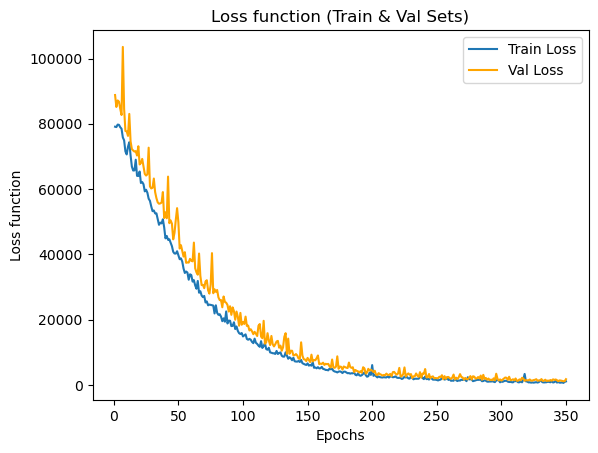

In [31]:
loss_function = regressor_history.history['loss']
val_loss_function = regressor_history.history['val_loss']
epochs = range(1, len(loss_function)+1)

plt.title('Loss function (Train & Val Sets)')
plt.plot(epochs, loss_function, label='Train Loss')
plt.plot(epochs, val_loss_function, color='orange', label='Val Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss function')
plt.legend()
plt.show()

#### График изменения величины средней абсолютной ошибки (Mean Absolute Error, MAE) модели в процессе
Две кривые: одна для обучающего набора данных ("Mean Absolute Error (Train)") и для валидационного набора данных ("Mean Absolute Error (Validation)").
Если на графике видно, что ошибка на обучающей выборке продолжает уменьшаться, в то время как ошибка на валидационной выборке начинает увеличиваться, это может свидетельствовать о переобучении модели, когда она хорошо обучается на тренировочных данных, но плохо справляется с новыми, наблюдаемыми во время валидации данными.

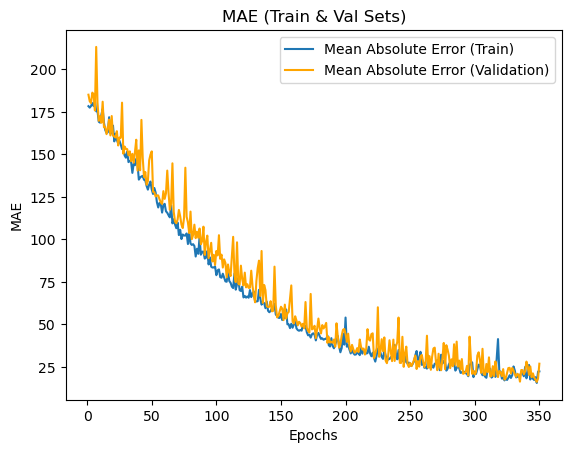

In [32]:
mae = regressor_history.history['mae']
val_mae = regressor_history.history['val_mae']
epochs = range(1, len(mae)+1)

plt.title('MAE (Train & Val Sets)')
plt.plot(epochs, mae, label='Mean Absolute Error (Train)')
plt.plot(epochs, val_mae, color='orange', label='Mean Absolute Error (Validation)')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()

In [33]:
results = regressor.evaluate(X_test, y_test)

32/32 [==============================] - 0s 4ms/step - loss: 1588.5815 - mae: 28.0636


In [34]:
y_test

6901      3540
4670      7372
6134     10914
2480     10781
8744      4837
         ...  
5834       688
10531    15046
1912     12806
6279      2744
3881     10903
Name: TOTALBTUCOL, Length: 995, dtype: int64

In [35]:
x_test_pattern = X_test[2, :]
y_pred = regressor.predict(x_test_pattern.reshape(1, -1))
print(y_pred[0])

1/1 [==============================] - 0s 48ms/step
[10929.391]


In [36]:
original_features = min_max_scaler.inverse_transform(x_test_pattern.reshape(1, -1))
original_features

array([[3.00000000e+00, 7.00000000e+00, 2.10000000e+01, 4.61011000e+02,
        4.61000000e+02, 3.19867000e+03, 1.09138550e+04, 3.02000000e+02,
        7.16000000e+03, 0.00000000e+00, 8.10162822e+03, 1.53600000e+03,
        1.00000000e+00, 1.00000000e+00, 2.25600000e+03, 9.28817000e+02,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 7.00000000e+01,
        1.53600000e+03, 0.00000000e+00, 1.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 1.00000000e+00, 9.29000000e+02, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 2.09852000e+03,
        7.16014700e+03, 0.00000000e+00, 0.00000000e+00, 4.00000000e+02,
        2.25600000e+03, 1.00000000e+00, 3.02451000e+02, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        4.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        4.00000000e+02, 1.93600000e+03, 1.53600000e+03, 0.000000

In [37]:
x_test_pattern

array([0.5       , 0.66666667, 0.76923077, 0.05960983, 0.05964549,
       0.0523986 , 0.05239854, 0.03259931, 0.017862  , 0.        ,
       0.17477496, 0.10244189, 0.        , 0.1       , 0.11532785,
       0.09676711, 0.        , 0.        , 0.        , 0.66666667,
       0.1055247 , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.06945639, 0.        , 0.        , 0.        ,
       0.        , 0.15159057, 0.1515907 , 0.        , 0.        ,
       0.05270787, 0.0682907 , 0.        , 0.22387924, 1.        ,
       0.        , 0.        , 0.        , 0.        , 0.42857143,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.0514668 , 0.09331459, 0.07118102,
       0.        , 0.        , 0.        , 0.        , 0.2       ,
       0.        , 0.        , 0.        , 0.13333333, 0.        ,
       0.04603602, 0.        , 0.        , 0.        , 0.        ,
       0.20628734, 0.2004597 , 0.20045939, 0.19047619, 1.     

In [38]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
y_pred = regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

32/32 [==============================] - 0s 3ms/step


### Метрики работы MSE, MAE, R2 

In [39]:
print(f"MSE: {mse}")
print(f"MAE: {mae}")
print(f"R2: {r2}")

MSE: 1588.583464797732
MAE: 28.06361318617011
R2: 0.9999828651563029
